<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [288]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [289]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [290]:
# Show Sample of Data
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
6814,15665943,445,France,Male,25,6,0.00,2,1,0,119425.94,0
6913,15784180,564,France,Female,36,7,206329.65,1,1,1,46632.87,1
8799,15803801,454,France,Male,34,4,0.00,2,1,0,198817.72,0
620,15682585,593,France,Male,35,9,114193.24,1,1,0,71154.10,0
6474,15626143,695,France,Male,37,2,0.00,2,1,1,99692.65,0


In [291]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 10000
Number of Columns : 12


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [293]:
# Check NaN Value
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [294]:
# Describe Numiric Data
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [295]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isna().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
customer_id,10000,0,0.0,10000
credit_score,10000,0,0.0,460
country,10000,0,0.0,3
gender,10000,0,0.0,2
age,10000,0,0.0,70
tenure,10000,0,0.0,11
balance,10000,0,0.0,6382
products_number,10000,0,0.0,4
credit_card,10000,0,0.0,2
active_member,10000,0,0.0,2


In [296]:
# Check Dublication
df.duplicated().sum()

0

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [297]:
columns_list_numiric = df.select_dtypes('number').columns.to_list()[:-1]
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 80th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

outliers_iqr = detect_outliers_iqr(df, columns_list_numiric)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

customer_id: 0 outliers detected
credit_score: 15 outliers detected
age: 359 outliers detected
tenure: 0 outliers detected
balance: 0 outliers detected
products_number: 60 outliers detected
credit_card: 0 outliers detected
active_member: 0 outliers detected
estimated_salary: 0 outliers detected


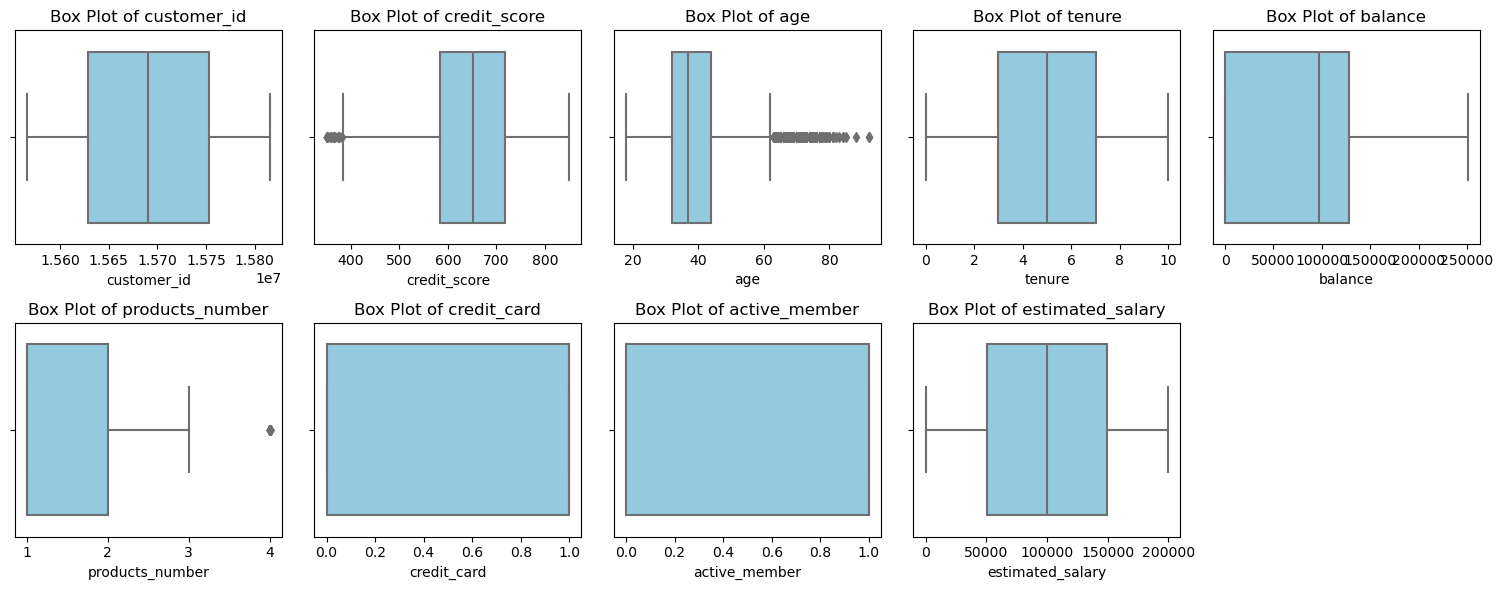

In [298]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(columns_list_numiric, 1):
    plt.subplot(2, 5, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [299]:
def remove_outliers(df, columns, threshold = 1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, columns_list_numiric)

In [300]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 9515
Number of Columns : 12


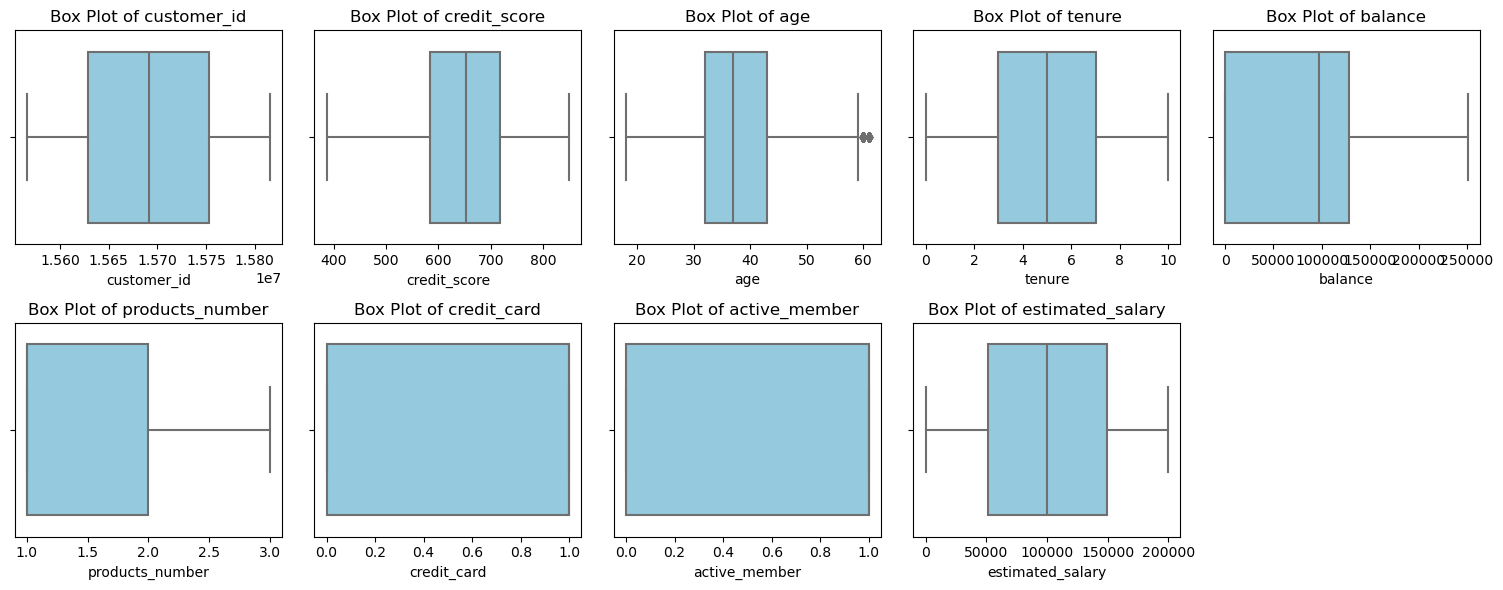

In [301]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(columns_list_numiric, 1):
    plt.subplot(2, 5, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [302]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7900,15617304,722,France,Male,40,6,0.00,2,1,1,111893.09,0
3525,15747345,678,France,Female,22,6,118064.93,2,1,1,195424.01,0
6048,15776743,647,France,Male,43,9,0.00,2,1,1,78488.39,0
8754,15793723,607,Germany,Male,32,9,144272.07,2,1,0,176580.63,0
4696,15784687,592,France,Male,36,1,126477.42,1,0,0,179718.17,0


In [303]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9515 non-null   int64  
 1   credit_score      9515 non-null   int64  
 2   country           9515 non-null   object 
 3   gender            9515 non-null   object 
 4   age               9515 non-null   int64  
 5   tenure            9515 non-null   int64  
 6   balance           9515 non-null   float64
 7   products_number   9515 non-null   int64  
 8   credit_card       9515 non-null   int64  
 9   active_member     9515 non-null   int64  
 10  estimated_salary  9515 non-null   float64
 11  churn             9515 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 892.2+ KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Distribution of Credit Score

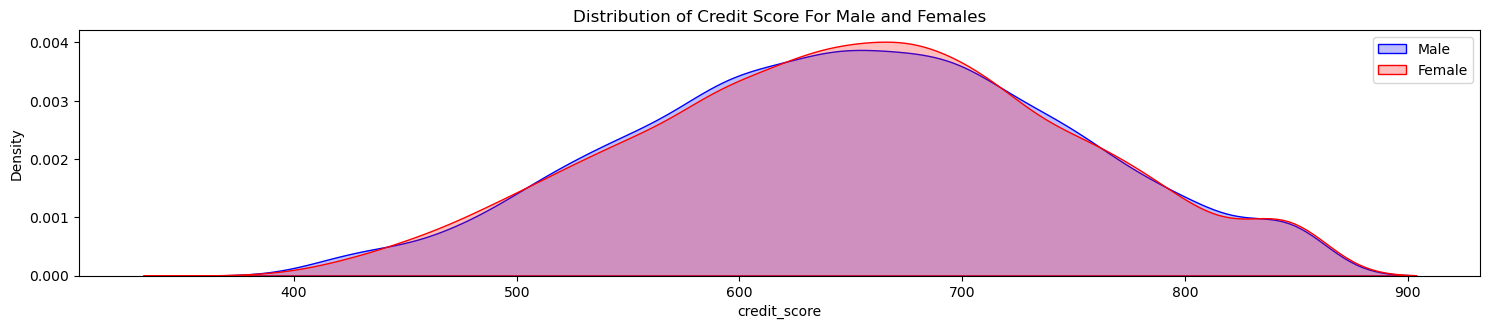

In [304]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Credit Score For Male and Females')
sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Male')]['credit_score'],color='blue',fill=True,label='Male')
sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Female')]['credit_score'],color='red',fill=True,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- In General Credit Score around from 600 to 700
- Credit Score for Male around from 500 to 600
- Credit Score for Female around from 600 to 700

## The Countries of Customer

In [305]:
countries = pd.DataFrame({
    "country": ["FRA", "ESP", "DEU"],
    "value": [4774,2357, 2384]
})

fig = px.choropleth(countries, 
                    locations="country", 
                    color="value",
                    hover_name="country", 
                    color_continuous_scale="Viridis",
                    locationmode="ISO-3",
                    title='Most Customer From ?')  

fig.show()


- Most Customer from France   

## Distribution of Age

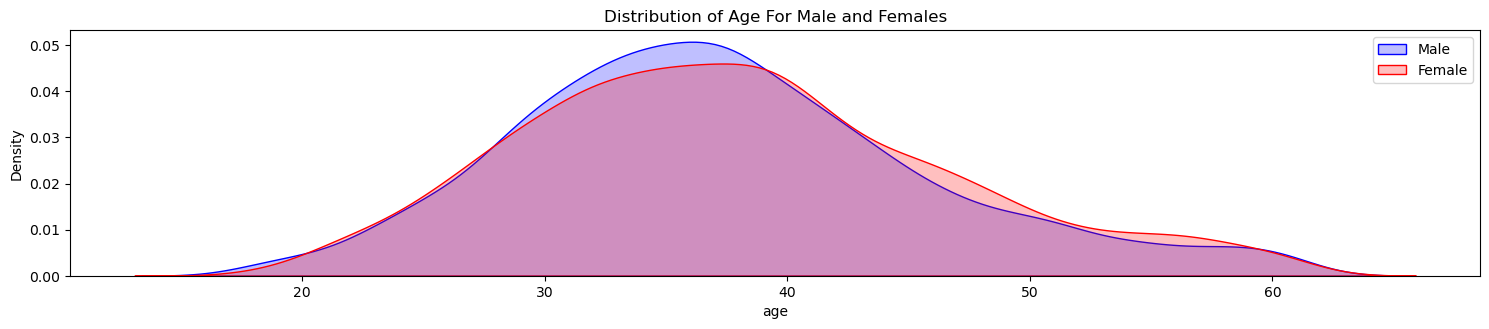

In [306]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Age For Male and Females')

sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Male')]['age'],color='blue',fill=True,label='Male')
sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Female')]['age'],color='red',fill=True,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Age for Male around from 30 to 40
- Age for Female around from 40 to 60

## Number of years the customer has been with the bank

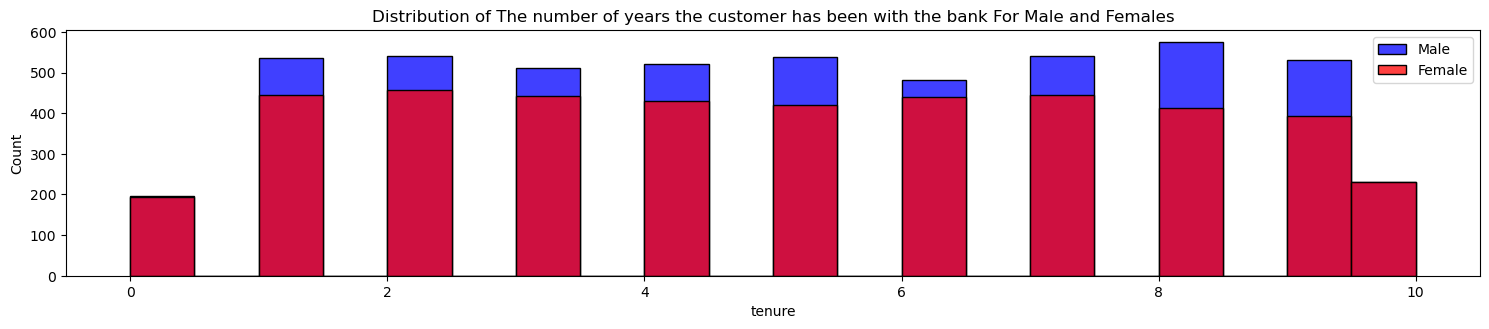

In [307]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of The number of years the customer has been with the bank For Male and Females')

sns.histplot(df_cleaned[(df_cleaned['gender'] == 'Male')]['tenure'],color='blue',bins=20,label='Male')
sns.histplot(df_cleaned[(df_cleaned['gender'] == 'Female')]['tenure'],color='red',bins=20,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Most The number of years the Customer has been with the bank is Males

## Balance VS Estimated Salary


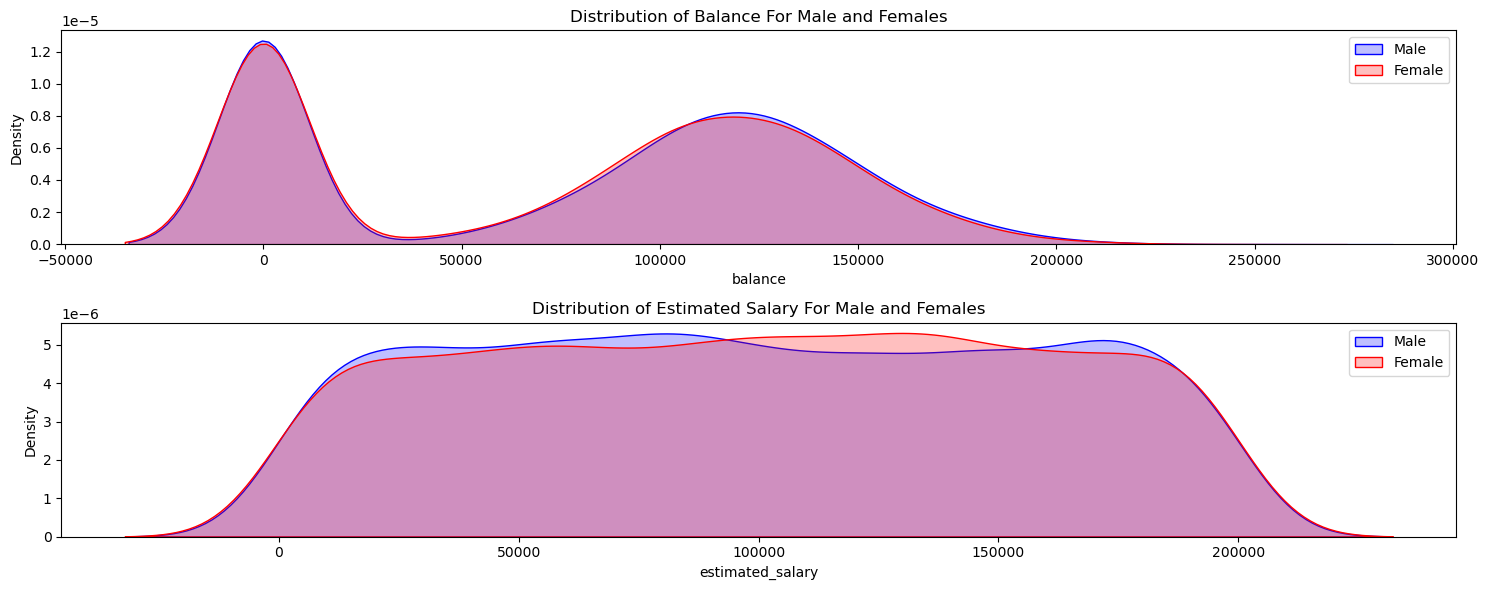

In [308]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Balance For Male and Females')

sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Male')]['balance'],color='blue',fill=True,label='Male')
sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Female')]['balance'],color='red',fill=True,label='Female')
plt.legend()

plt.subplot(2,1,2)

plt.title('Distribution of Estimated Salary For Male and Females')

sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Male')]['estimated_salary'],color='blue',fill=True,label='Male')
sns.kdeplot(df_cleaned[(df_cleaned['gender'] == 'Female')]['estimated_salary'],color='red',fill=True,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Higher Estimated Salary Higher Balance
- Most Estimated Salary for Female from 100000 to 150000
- Most Estimated Salary for Male from 150000 to 200000

## Is this Customer have Credit Card ?

In [309]:
fig = px.pie(values = df_cleaned['credit_card'].value_counts(),
             names = ['Yes','No'],
             template = 'plotly_dark',
             title = 'The Percentage of Customer have Credit Card'
             ).update_traces(textinfo='label+percent')
fig.show()

- 70% Of Customer Have Credit Card

## Total Insights
- In General Credit Score around from 600 to 700
- Credit Score for Male around from 500 to 600
- Credit Score for Female around from 600 to 700
- Most Customer from France   
- Age for Male around from 30 to 40
- Age for Female around from 40 to 60
- Most The number of years the Customer has been with the bank is Males
- Higher Estimated Salary Higher Balance
- Most Estimated Salary for Female from 100000 to 150000
- Most Estimated Salary for Male from 150000 to 200000
- 70% Of Customer Have Credit Card

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

## Handling Object DataType

### Encode Object DataType 

In [310]:
column_to_encode = df_cleaned.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [311]:
# Show Data After some of Encode
df_cleaned.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [312]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9515 non-null   int64  
 1   credit_score      9515 non-null   int64  
 2   country           9515 non-null   int32  
 3   gender            9515 non-null   int32  
 4   age               9515 non-null   int64  
 5   tenure            9515 non-null   int64  
 6   balance           9515 non-null   float64
 7   products_number   9515 non-null   int64  
 8   credit_card       9515 non-null   int64  
 9   active_member     9515 non-null   int64  
 10  estimated_salary  9515 non-null   float64
 11  churn             9515 non-null   int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 817.8 KB


### Normalization

In [313]:
column_To_Scaler = ['credit_score','balance','estimated_salary']
scaler = MinMaxScaler()
for column in column_To_Scaler:
    df_cleaned[column] = scaler.fit_transform(df_cleaned[[column]])

In [314]:
# Show Final Data 
df_cleaned.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,0.502155,0,0,42,2,0.000000,1,1,1,0.506735,1
1,15647311,0.478448,2,0,41,1,0.334031,1,0,1,0.562709,0
2,15619304,0.250000,0,0,42,8,0.636357,3,1,0,0.569654,1
3,15701354,0.674569,0,0,39,1,0.000000,2,0,0,0.469120,0
4,15737888,1.000000,2,0,43,2,0.500246,1,1,1,0.395400,0


In [315]:
# Show Final Describe of Data 
df_cleaned.describe()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.515000e+03,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000
mean,1.569101e+07,0.570520,0.745980,0.547241,37.602102,5.013663,0.304597,1.515922,0.705833,0.502680,0.500579,0.196427
std,7.189463e+04,0.206949,0.827644,0.497789,8.621119,2.887532,0.248865,0.549460,0.455691,0.500019,0.287594,0.397316
min,1.556570e+07,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,0.426724,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.255531,0.000000
50%,1.569145e+07,0.573276,0.000000,1.000000,37.000000,5.000000,0.386781,1.000000,1.000000,1.000000,0.500645,0.000000
75%,1.575319e+07,0.713362,1.000000,1.000000,43.000000,7.000000,0.508669,2.000000,1.000000,1.000000,0.747338,0.000000
max,1.581569e+07,1.000000,2.000000,1.000000,61.000000,10.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Assign feature and target variables

In [316]:
fig = px.imshow(df_cleaned.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

In [317]:
# customer_id No correlation between these features compared to other features
X = df_cleaned.drop(['churn','customer_id'] , axis = 1)
y = df_cleaned['churn']

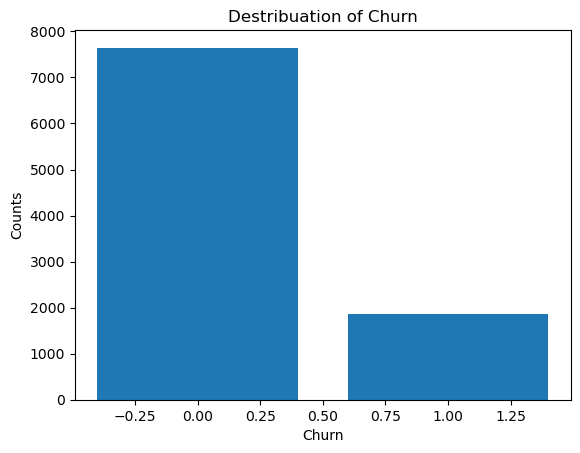

In [318]:
# check for imbalanced data
counts = y.value_counts()
plt.bar(counts.index , counts.values)
plt.title('Destribuation of Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

### Handle Imbalanced Data

In [319]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)


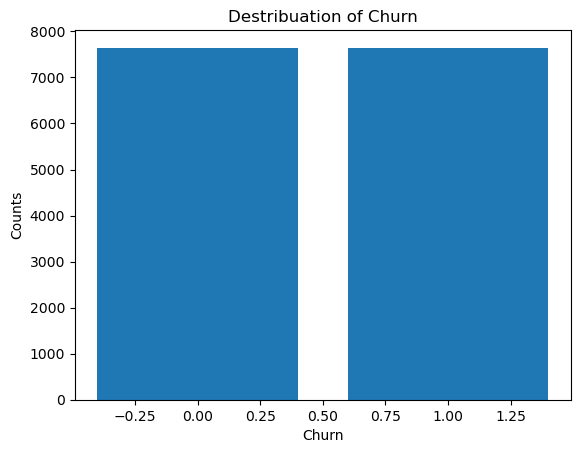

In [320]:
counts = y.value_counts()
plt.bar(counts.index , counts.values)
plt.title('Destribuation of Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

## Splitting Data 

In [321]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [322]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (11469, 10)
Shape of X_Test (3823, 10)
Shape of Y_Train (11469,)
Shape of Y_Test (3823,)


In [323]:
# Show New Correlation
combined = pd.concat([X_train,y_train], axis=1)
fig = px.imshow(combined.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [324]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## Logistic Regression

In [325]:
lr = LogisticRegression()
Kfold(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 74.32687005475833%
Logistic Regression model score on Training data: 74.5836603016828%
Logistic Regression model score on Testing data: 73.94716191472665%


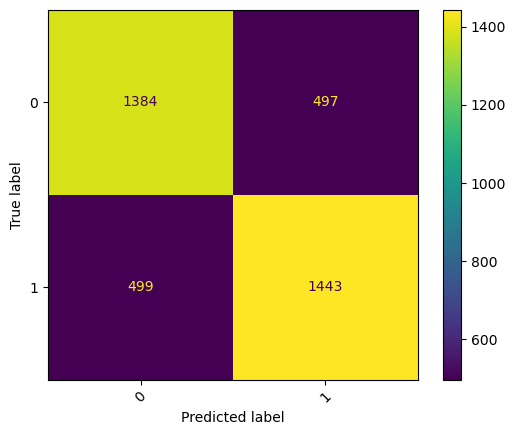

In [326]:
ConfusionMatrixDisplay.from_estimator(lr,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [327]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1881
           1       0.74      0.74      0.74      1942

    accuracy                           0.74      3823
   macro avg       0.74      0.74      0.74      3823
weighted avg       0.74      0.74      0.74      3823



## Random Forest

In [328]:
rf = RandomForestClassifier(n_estimators = 30 , max_depth = 15)
Kfold(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 86.3073562540342%
Random Forest model score on Training data: 98.05562821518878%
Random Forest model score on Testing data: 86.16269945069317%


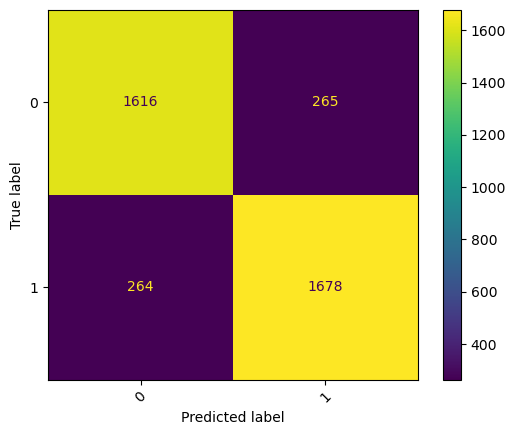

In [329]:
ConfusionMatrixDisplay.from_estimator(rf,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [330]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1881
           1       0.86      0.86      0.86      1942

    accuracy                           0.86      3823
   macro avg       0.86      0.86      0.86      3823
weighted avg       0.86      0.86      0.86      3823



## KNN

In [331]:
knn = KNeighborsClassifier()
Kfold(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 84.18823443918662%
KNN model score on Training data: 88.43839916296102%
KNN model score on Testing data: 82.86685848809834%


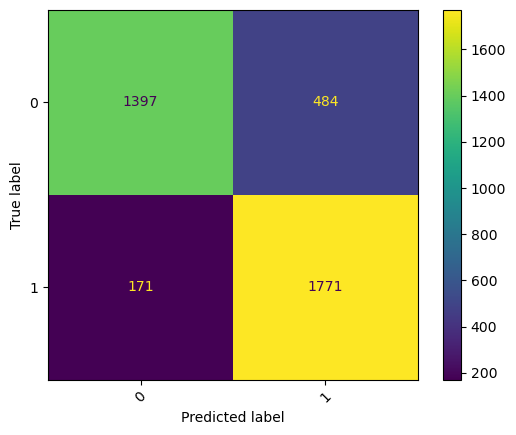

In [332]:
ConfusionMatrixDisplay.from_estimator(knn,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [333]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1881
           1       0.79      0.91      0.84      1942

    accuracy                           0.83      3823
   macro avg       0.84      0.83      0.83      3823
weighted avg       0.84      0.83      0.83      3823



## Bagging

In [334]:
bagg_model = BaggingClassifier(n_estimators=50)
Kfold(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 86.61470823341327%
Bagging model score on Training data: 99.9738425320429%
Bagging model score on Testing data: 86.34580172639289%


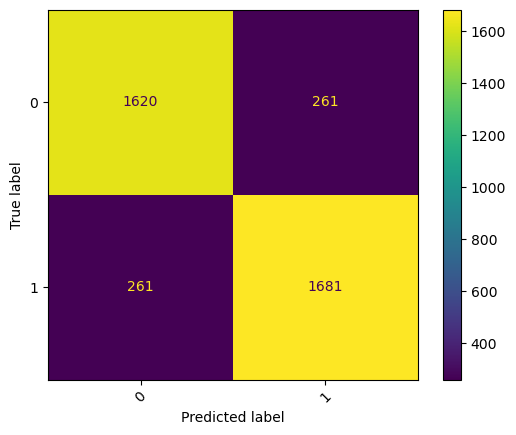

In [335]:
ConfusionMatrixDisplay.from_estimator(bagg_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [336]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1881
           1       0.87      0.87      0.87      1942

    accuracy                           0.86      3823
   macro avg       0.86      0.86      0.86      3823
weighted avg       0.86      0.86      0.86      3823



## Gradient Boosting

In [337]:
gb_model = GradientBoostingClassifier(n_estimators=100)
Kfold(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 81.76892069232315%
Boosting model score on Training data: 82.88429680006976%
Boosting model score on Testing data: 82.1344493852995%


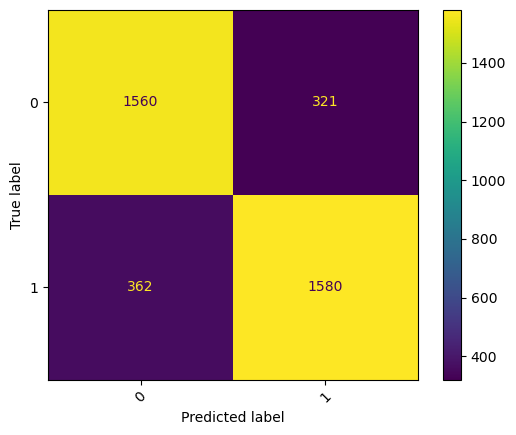

In [338]:
ConfusionMatrixDisplay.from_estimator(gb_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [339]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1881
           1       0.83      0.81      0.82      1942

    accuracy                           0.82      3823
   macro avg       0.82      0.82      0.82      3823
weighted avg       0.82      0.82      0.82      3823



## Decision Tree

In [340]:
dt_model = DecisionTreeClassifier(max_depth=12)
Kfold(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 80.75528454241955%
Decision Tree model score on Training data: 90.94951608684279%
Decision Tree model score on Testing data: 80.04185194873136%


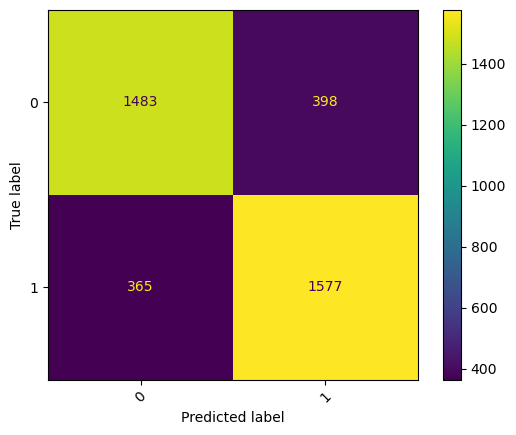

In [341]:
ConfusionMatrixDisplay.from_estimator(dt_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [342]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1881
           1       0.80      0.81      0.81      1942

    accuracy                           0.80      3823
   macro avg       0.80      0.80      0.80      3823
weighted avg       0.80      0.80      0.80      3823



## Xgboost

In [343]:
xgboost = model = XGBClassifier(objective = "binary:logistic" , subsample = 0.7 , min_child_weight = 3,
                                max_depth = 3 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.5,)
Kfold(xgboost, "Xgboost")
train(xgboost, "Xgboost")

Xgboost score on cross validation: 81.5270136831711%
Xgboost model score on Training data: 82.40474322085622%
Xgboost model score on Testing data: 82.1344493852995%


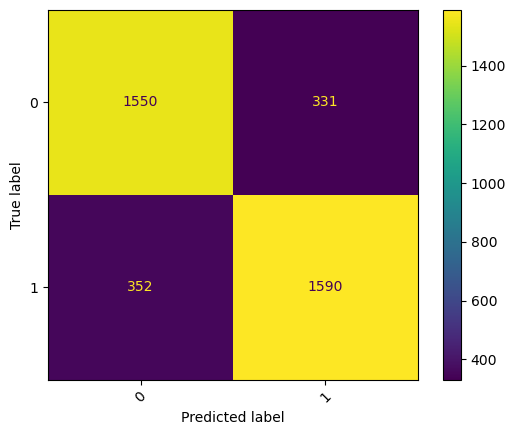

In [344]:
ConfusionMatrixDisplay.from_estimator(xgboost,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [345]:
class_report(xgboost)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1881
           1       0.83      0.82      0.82      1942

    accuracy                           0.82      3823
   macro avg       0.82      0.82      0.82      3823
weighted avg       0.82      0.82      0.82      3823



## NN

In [362]:
KerasModel = keras.models.Sequential([
            keras.layers.Dense(128, activation = 'sigmoid'),
            keras.layers.Dense(64, activation = 'sigmoid'),
            keras.layers.Dense(32, activation = 'sigmoid'),
            keras.layers.Dense(1, activation = 'sigmoid'),
            ])
KerasModel.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [363]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=150,
                         batch_size=10,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)])

Epoch 1/150
1147/1147 [==============================] - 2s 1ms/step - loss: 0.5610 - accuracy: 0.7106 - val_loss: 0.5318 - val_accuracy: 0.7298
Epoch 2/150
1147/1147 [==============================] - 2s 1ms/step - loss: 0.5270 - accuracy: 0.7371 - val_loss: 0.5201 - val_accuracy: 0.7387
Epoch 3/150
1147/1147 [==============================] - 1s 1ms/step - loss: 0.5224 - accuracy: 0.7404 - val_loss: 0.5214 - val_accuracy: 0.7400
Epoch 4/150
1147/1147 [==============================] - 1s 1ms/step - loss: 0.5194 - accuracy: 0.7428 - val_loss: 0.5290 - val_accuracy: 0.7293
Epoch 5/150
1147/1147 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7438 - val_loss: 0.5168 - val_accuracy: 0.7442
Epoch 6/150
1147/1147 [==============================] - 1s 1ms/step - loss: 0.5150 - accuracy: 0.7460 - val_loss: 0.5140 - val_accuracy: 0.7374
Epoch 7/150
1147/1147 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7406 - val_loss: 0.5127 - val_ac

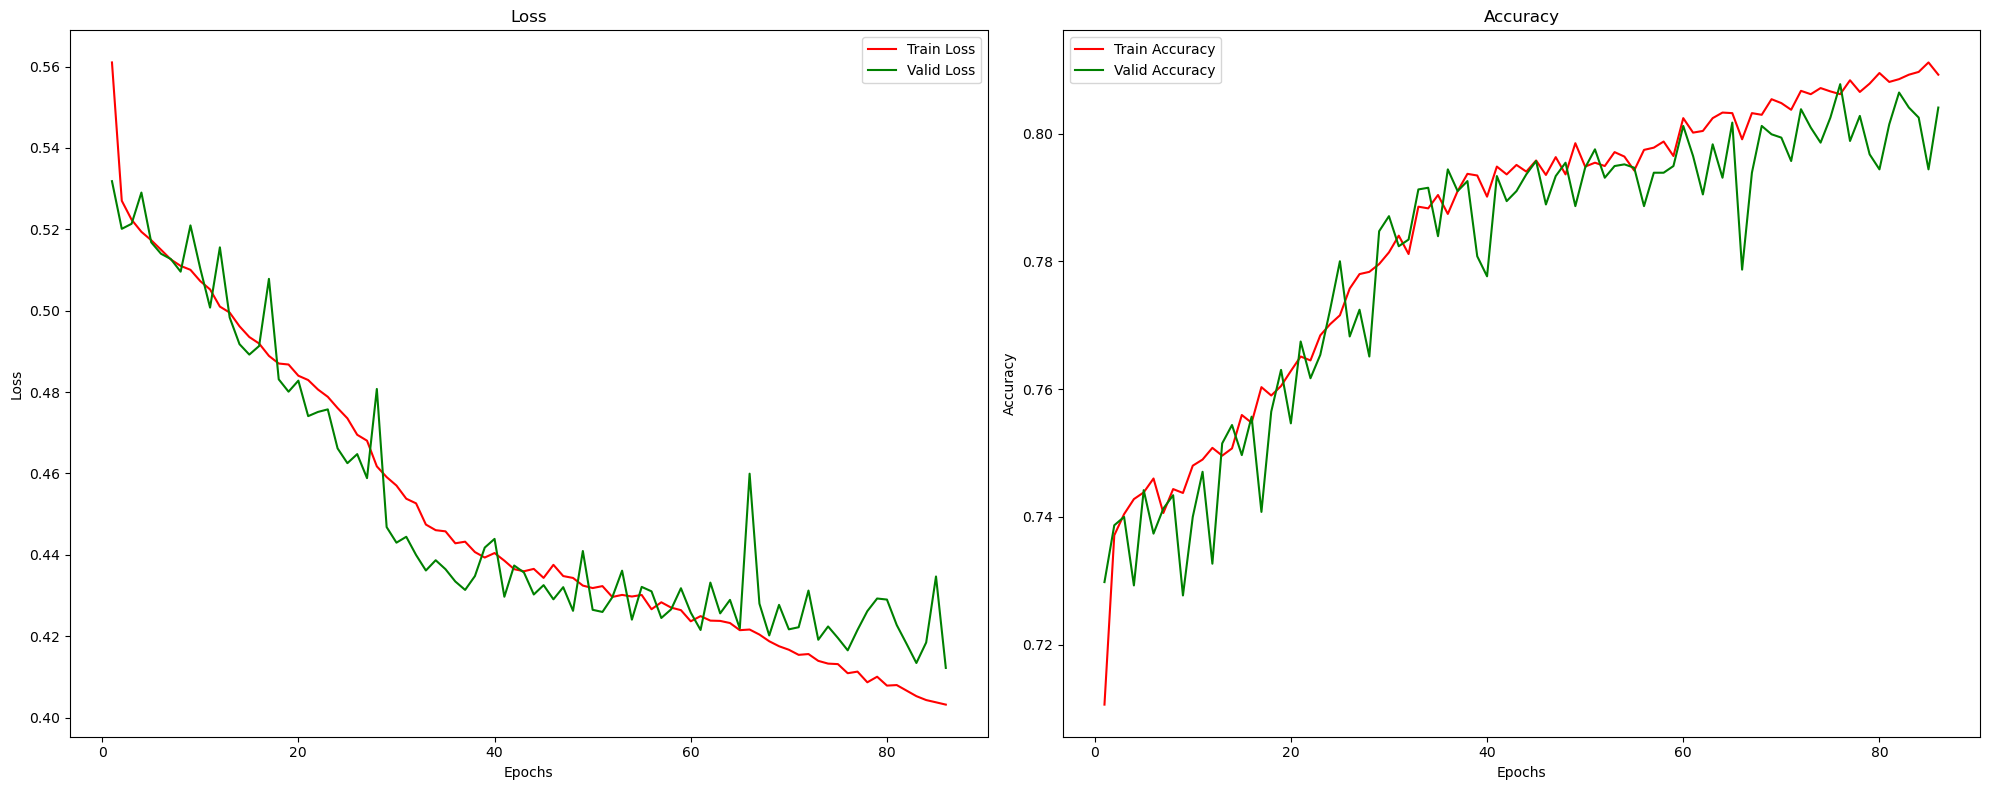

In [364]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [365]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

120/120 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8077
Model Loss is 0.41652628779411316
Model Accuracy is 0.8077425956726074
